In [75]:
import json
from src.modules.fullDose import *
from src.main import *

a = FullDoseDT()


In [76]:
print(len(a.train_data), len(a.test_data), len(a.validate_data), len(a.data))


704 234 235 1173


In [77]:
a.train()


In [78]:
print(len(a.decision_list))


221


In [79]:
a.test()
a.test(a.validate_data)
a.test(a.train_data)


决策树的正确率： 93.58974358974359 %
决策树的正确率： 92.34042553191489 %
决策树的正确率： 97.44318181818183 %


In [80]:
len(a.decision_list)
complete_tree = pd.DataFrame(a.decision_list)
write_to_excel(complete_tree, 'excel/t4.1_complete_tree.xlsx')


In [81]:
a.cut()


In [82]:
print(len(a.decision_list))
a.test()
a.test(a.validate_data)
a.test(a.train_data)


56
决策树的正确率： 92.73504273504274 %
决策树的正确率： 94.04255319148936 %
决策树的正确率： 93.18181818181817 %


In [83]:
import pandas as pd


In [84]:
cut_tree = pd.DataFrame(a.decision_list)
write_to_excel(cut_tree, 'excel/t4.2_cut_tree.xlsx')


In [85]:
Ps = {
    'DC': 0,
    'OS': 0,
    'IS': 0,
    'BC': 0,
    'CC': 0,
}
for path in a.decision_list:
    for attr in Ps.keys():
        if attr in path.keys():
            Ps[attr] += 1


count = np.array(list(Ps.values()))

y = count / 56


In [86]:
Ps = {
    'DC': 0,
    'OS': 0,
    'IS': 0,
    'BC': 0,
    'CC': 0,
}
for path in a.decision_list:
    for attr in Ps.keys():
        if attr in path.keys():
            Ps[attr] += 1


count = np.array(list(Ps.values()))

ys = count / 56


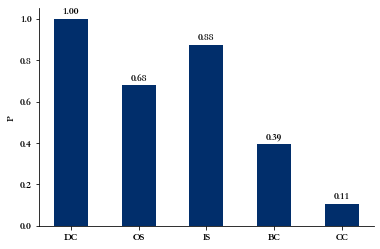

In [87]:
fig, axes = plt.subplots()
xs = list(Ps.keys())
axes.bar(xs, ys, width=0.5, color="#012E6B")
axes.spines[['right', 'top']].set_visible(False)
for x, y in zip(xs, ys):
    plt.text(x, y+0.02, '%.2f' % y, ha="center")

axes.set_ylabel('P')
# axes.set_xlabel('条件属性')

plt.savefig('c5.svg', format="svg", bbox_inches="tight")
plt.show()


In [88]:
Ps = [0 for _ in range(len(a.decision_list))]


In [89]:
for node in a.data:
    for i, path in enumerate(a.decision_list):
        is_hit = True
        for attr, v in path.items():
            if attr == 'label':
                continue
            if v != node[attr]:
                is_hit = False
                # break
        if(is_hit):
            Ps[i] += 1
            # break


In [90]:
cluster = [[] for _ in range(0, 6)]
for i, path in enumerate(a.decision_list):
    cluster[path['label'] - 1].append(Ps[i])

group_count = [len(g) for g in cluster]



In [91]:
cluster = [[count for count in label if count > 0] for label in cluster]

total = sum([sum(g) for g in cluster])


[2.4]
[4.8 5.8 6.8]
[ 9.2 10.2 11.2 12.2 13.2]
[15.6 16.6 17.6 18.6 19.6 20.6 21.6 22.6]
[25. 26. 27. 28. 29. 30. 31. 32.]
[34.4 35.4 36.4 37.4 38.4 39.4 40.4 41.4 42.4 43.4 44.4]


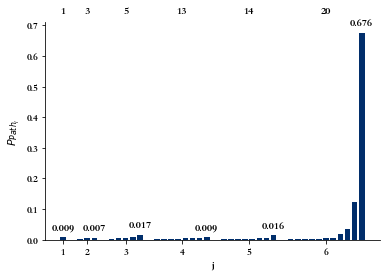

In [92]:
fig, axes = plt.subplots()

x_offset = 0
width = 0.8
group_gap = 2

x_ticks = []

max_y = 0

for i, group in enumerate(cluster):
    xs = np.arange(0, len(group)) + x_offset + width / 2 + group_gap
    print(xs)
    ys = [count / total for count in sorted(group)]
    x_offset = xs[-1]

    tick = (xs[-1] + xs[0]) / 2
    x_ticks.append(tick)

    axes.text(xs[-1], ys[-1] + 0.02, '%.3f' % ys[-1], ha="center", fontsize=11)

    if ys[-1] > max_y:
        max_y = ys[-1]

    axes.bar(xs, ys, width=0.8, color="#012E6B")

for i, count in enumerate(group_count):
    axes.text(x_ticks[i], max_y + 0.06, count, ha="center", fontsize=11)

axes.set_xticks(x_ticks)
axes.set_xticklabels([1, 2, 3, 4, 5, 6])

axes.set_ylabel(r'$P_{Path_l}$', size=11)
axes.set_xlabel(r'j', size=11)

# plt.title('图6 决策路径的分布概率', y=-0.3, size=11)


axes.spines[['top', 'right']].set_visible(False)

plt.savefig('c6.svg', format="svg", bbox_inches="tight")


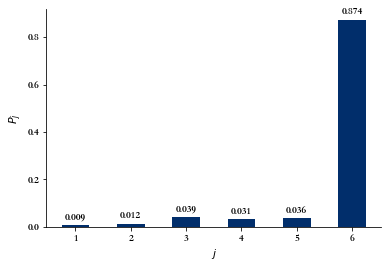

In [93]:
hierarchical_risk = [sum(g) / total for g in cluster]

fig, ax = plt.subplots()
ys = hierarchical_risk
xs = np.arange(1, len(ys) + 1)

ax.spines[['right', 'top']].set_visible(False)
for x, y in zip(xs, ys):
    plt.text(x, y+0.02, '%.3f' % y, ha="center")

ax.set_xlabel(r'$j$', fontsize=11)
ax.set_ylabel(r'$P_j$', fontsize=11)


ax.bar(xs, ys, width=0.5, color="#012E6B")

# plt.title('图7 线路脆弱性层次风险', y=-0.3, size=11)

plt.savefig("c7.svg", format="svg", bbox_inches="tight")


In [94]:
with open("src/data/all_Es.json") as f:
    all_Es = json.load(f)
Es = [item['E'] for item in all_Es]


In [95]:
'''
clusters, nodes = Report.cluster_nodes_by(all_Es, 'E', 'E', layers=50)
with open("src/data/all_Es_cluster_50.json", 'w') as f:
    json.dump(clusters, f)
'''


'\nclusters, nodes = Report.cluster_nodes_by(all_Es, \'E\', \'E\', layers=50)\nwith open("src/data/all_Es_cluster_50.json", \'w\') as f:\n    json.dump(clusters, f)\n'

In [96]:
with open("src/data/all_Es_cluster_50.json") as f:
    clusters = json.load(f)


In [97]:
Ps = [len(cls) / len(all_Es) for cls in clusters]


In [109]:
E_clusters_seps = []
for ind, group in enumerate(clusters):
    E_clusters_seps.append(group[-1])

E_clusters_seps = E_clusters_seps[:-1]


def find_ind(v):
    for i, sep in enumerate(E_clusters_seps):
        if v > sep:
            return i

    return len(E_clusters_seps)


find_ind(1)


46

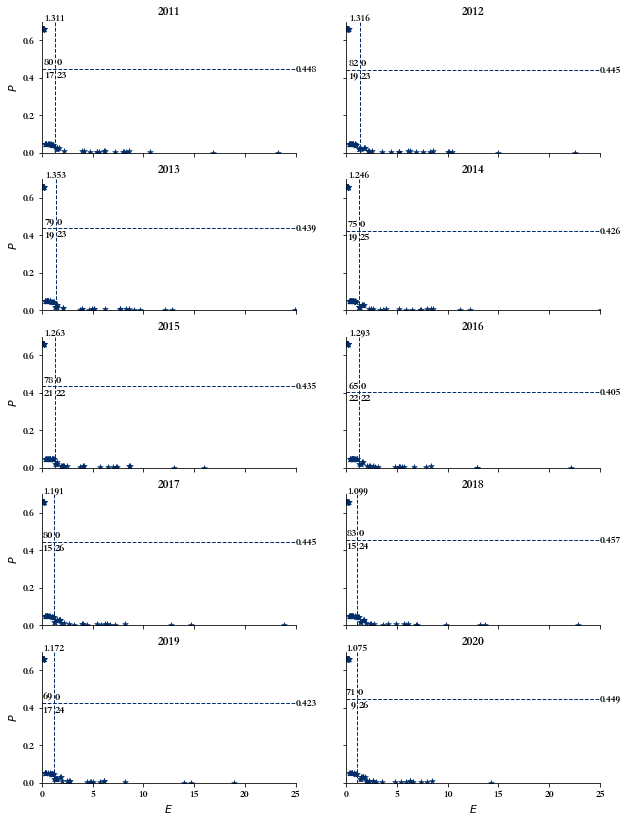

In [136]:
def draw_scatter():

    file = [
        '2011', '2012', '2013', '2014', '2015',
        '2016', '2017', '2018', '2019', '2020',
    ]

    fig, axes = plt.subplots(5, 2, figsize=(10, 14), sharex=True, sharey=True)

    for i, axe in enumerate(axes.flatten()):

        with open("src/data/Es_" + file[i] + ".json") as f:
            Es = json.load(f)

        xs = [item['E'] for item in Es]
        ys = [Ps[find_ind(x)] for x in xs]

        xs_m = sum(xs) / len(xs)
        ys_m = sum(ys) / len(ys)

        xys = list(zip(xs, ys))
        hh = [xy for xy in xys if xy[0] > xs_m and xy[1] > ys_m]
        hl = [xy for xy in xys if xy[0] > xs_m and xy[1] <= ys_m]
        lh = [xy for xy in xys if xy[0] <= xs_m and xy[1] > ys_m]
        ll = [xy for xy in xys if xy[0] <= xs_m and xy[1] <= ys_m]

        axe.scatter(xs, ys, marker='*', c="#012E6B", linewidths=0.5)
        axe.axhline(y=ys_m, c='#012E6B', ls='--', lw=1)
        axe.axvline(x=xs_m, c='#012E6B', ls='--', lw=1)

        x_ticks = list(axe.get_xticks())
        # x_ticks.append(xs_m)
        axe.set_xticks(x_ticks)
        y_ticks = list(axe.get_yticks())
        # y_ticks.append(ys_m)
        axe.set_yticks(y_ticks)

        if i % 2 == 0:
            axe.set_ylabel('$P$', fontsize=11)
        if i > 7:
            axe.set_xlabel('$E$', fontsize=11)

        axe.spines[['right',  'top']].set_visible(False)
        count = str(len(lh)) + '  ' + str(len(hh)) + '\n' + \
            str(len(ll)) + '  ' + str(len(hl))
        axe.text(xs_m-0.1, ys_m+0.01, str(len(lh)),
                 va="bottom", ha="right", fontsize=11)
        axe.text(xs_m+0.1, ys_m+0.01, str(len(hh)),
                 va="bottom", ha="left", fontsize=11)
        axe.text(xs_m-0.1, ys_m-0.01, str(len(ll)),
                 va="top", ha="right", fontsize=11)
        axe.text(xs_m+0.1, ys_m-0.01, str(len(hl)),
                 va="top", ha="left", fontsize=11)

        axe.text(25.02, ys_m, '%.3f' % ys_m,  va="center", ha="left")
        axe.text(xs_m, 0.72, '%.3f' % xs_m, va="center", ha="center")

        axe.set_title(file[i])

        axe.set_xlim(0, 25)
        axe.set_ylim(0, 0.7)

        # plt.title('图8 2020年各节点脆弱性的概率水平', y=-0.2, size=11)
        plt.savefig('c8.svg', format="svg", bbox_inches="tight")

    plt.show()


draw_scatter()
